In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Dense,Input,Flatten,Dropout,SimpleRNN,LSTM,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2022-09-14 16:46:59--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.2’

spam.csv.2          100%[===================>] 491.86K  1.64MB/s    in 0.3s    

2022-09-14 16:47:00 (1.64 MB/s) - ‘spam.csv.2’ saved [503663/503663]



In [4]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.columns=['target','data']

In [9]:
df.head()

,target,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['encoded_target']=df['target'].map({'ham':0,'spam':1})
Y=df['encoded_target'].values

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df['data'],Y,test_size=0.33)

In [12]:
MAX_VOCAB_SIZE=20000

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE) # utile per evitare le parole rare o mispelling, et similia
tokenizer.fit_on_texts(x_train) # basta solo questa fit perché si suppone ci siano le stesse parole che nel test
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq=tokenizer.texts_to_sequences(x_test)

In [13]:
tokenizer.word_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'is': 8,
 'in': 9,
 'my': 10,
 'for': 11,
 'me': 12,
 'your': 13,
 'of': 14,
 'it': 15,
 'have': 16,
 'call': 17,
 'on': 18,
 '2': 19,
 'that': 20,
 'now': 21,
 'are': 22,
 'so': 23,
 'not': 24,
 'but': 25,
 'can': 26,
 'do': 27,
 'or': 28,
 'be': 29,
 'if': 30,
 'get': 31,
 'at': 32,
 'we': 33,
 'will': 34,
 "i'm": 35,
 'with': 36,
 'just': 37,
 'ur': 38,
 'this': 39,
 'no': 40,
 'gt': 41,
 'lt': 42,
 '4': 43,
 'when': 44,
 'up': 45,
 'go': 46,
 'out': 47,
 'free': 48,
 'from': 49,
 'what': 50,
 'how': 51,
 'know': 52,
 'all': 53,
 'good': 54,
 'like': 55,
 'ok': 56,
 'got': 57,
 'was': 58,
 'then': 59,
 'time': 60,
 'only': 61,
 'am': 62,
 'love': 63,
 'day': 64,
 'its': 65,
 'come': 66,
 'text': 67,
 'want': 68,
 'he': 69,
 'txt': 70,
 'there': 71,
 'send': 72,
 'as': 73,
 'going': 74,
 'one': 75,
 'by': 76,
 'lor': 77,
 "i'll": 78,
 'stop': 79,
 'still': 80,
 'n': 81,
 'see': 82,
 'about': 83,
 'need': 84,
 'hom

In [14]:
T=189
x_train_data = pad_sequences(x_train_seq,maxlen=T)
x_test_data=pad_sequences(x_test_seq,maxlen=T)


In [15]:
V=len(tokenizer.word_index)
V # unique token

7263

In [16]:
x_train_data

array([[   0,    0,    0, ...,    3,  164,  133],
       [   0,    0,    0, ...,    4, 3385, 3386],
       [   0,    0,    0, ...,  989, 2293,  356],
       ...,
       [   0,    0,    0, ...,   57,    4,   24],
       [   0,    0,    0, ...,    2,   27,  180],
       [   0,    0,    0, ...,  390,   28,  403]], dtype=int32)

In [17]:
x_train_data.shape

(3733, 189)

In [18]:
x_test_data.shape

(1839, 189)

In [19]:
D=20

M=15


i = Input(shape=(T,))
x=Embedding(V+1,D)(i) # mettiamo +1 poiché partiamo da 1, non da 0, quindi ce ne serve uno in più, in quanto 
                    # gli array su python iniziano da 0
x=LSTM(M,return_sequences=True)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(1,activation='sigmoid')(x)

model = Model(i,x)

model.compile(
    optimizer = tf.optimizers.Adam(lr=0.1),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

r = model.fit(x_train_data,y_train,
              validation_data=(x_test_data,y_test),
              epochs=10
              )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


117/117 [==============================] - 26s 179ms/step - loss: 0.1317 - accuracy: 0.9499 - val_loss: 0.1082 - val_accuracy: 0.9723
Epoch 2/10
117/117 [==============================] - 10s 82ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.1035 - val_accuracy: 0.9728
Epoch 3/10
117/117 [==============================] - 10s 83ms/step - loss: 0.0211 - accuracy: 0.9936 - val_loss: 0.0900 - val_accuracy: 0.9766
Epoch 4/10
117/117 [==============================] - 10s 84ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0976 - val_accuracy: 0.9761
Epoch 5/10
117/117 [==============================] - 10s 84ms/step - loss: 0.0136 - accuracy: 0.9962 - val_loss: 0.1155 - val_accuracy: 0.9755
Epoch 6/10
117/117 [==============================] - 10s 84ms/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.0915 - val_accuracy: 0.9755
Epoch 7/10
117/117 [==============================] - 10s 82ms/step - loss: 0.0192 - accuracy: 0.9946 - val_loss: 0.1232 - val_accuracy: 0.9750
Ep

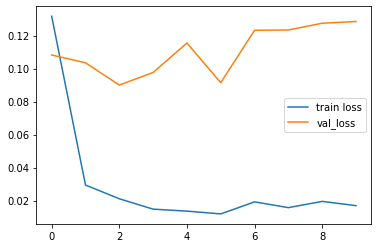

In [20]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],
label='val_loss')
plt.legend()

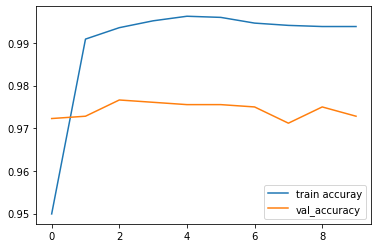

In [21]:
plt.plot(r.history['accuracy'],label='train accuray')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()